# Exploring the Sonic Landscape
## A Music Recommendation System Based on Sound Content


If you're like me, you love music. I love music and I love to find new music. Spotify is one of the top streaming services for music on the internet, and it already includes amazing tools that help you to discover new music based on what you listen to. It does this through a combination of different algortihms, including collaboritive filtering where similar usage between users is tracked and used to generate recommendations, or content based recommendations which recommend new songs based on similar information between the information linked to a song. Like a song? On Spotify, you can listen to that songs 'radio', which will collect a group of songs similar to that song in some way or a combination of ways. What if you like a song, but don't care about any information other than just the sound in it? Sometimes, that is all I want to hear.

I created this project to make a music recomendation system based the information in the sound of music alone. It will help a user to find new music through similar sounding songs. To do that, it will also explore the similarities between all music, and attempt to capture the timbre, rhythm, and style of a song mathematically.

### What is sound?

Sound is always around us. Throughout our lives, we grow to discern different sounds from others. Music is no different - there are many types of music and music is often a combination of many different kinds of sounds and rhythms that we can also discern apart from others. But can we quantify that information for ourselves? Sometimes, music is categorized into genres, meaning that a genre is a group of music with similar qualities of style, form, rhythm, timbre, instruments, or culture. But not every musical artist creates sound in the same genre, or not every genre contains the same kind of music. So what is sound, and how to do we discern different types of sound.

Basically, sound is a vibration of acoustical waves that we perceive through our ears when those waves vibrate our ear drums. A sound wave is a **signal** and the speed at which that signal vibrates is known as **frequency**. If a sound frequency is higher, we perceive that sound to have a higher pitch. In music, instruments like bass or bass drums will create sounds that vibrate at a lower frequency, where as high pitches have a higher frequency. Sounds like the clash of a cymbal or high hat, are a combination of many waves at different frequencies and are represented by a 'noisy', almost random looking wave.

What does sound look like? One way we can visualize sound is to plot a signal across time:

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

### Sound Waves visualized

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


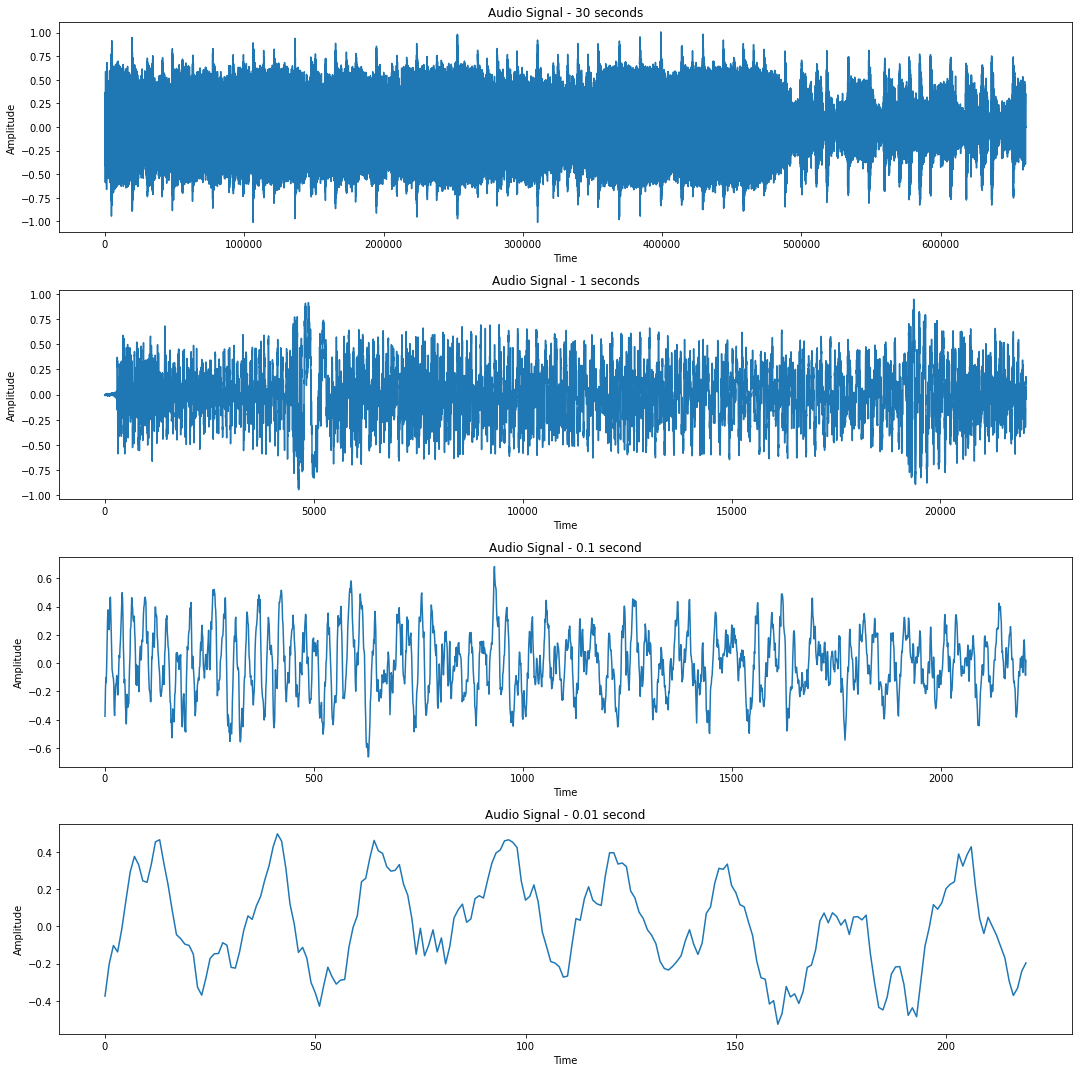

In [2]:
sound_sample_file = 'data/preview_test.mp3'

# load sound file with librosa
signal, sample_rate = librosa.load(sound_sample_file)

#plot 30 second sample
fig, ax = plt.subplots(nrows=4, figsize=(15,15))
ax[0].set_title('Audio Signal - 30 seconds')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('Time')
ax[0].plot(range(len(signal)), signal)

#plot 1 second sample
signal_sample = signal[:sample_rate]
ax[1].set_title('Audio Signal - 1 seconds')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('Time')
ax[1].plot(range(len(signal_sample)), signal_sample)

#plot 0.1 second sample
signal_short = signal[500:500+sample_rate//10]
ax[2].set_title('Audio Signal - 0.1 second')
ax[2].set_ylabel('Amplitude')
ax[2].set_xlabel('Time')
ax[2].plot(range(len(signal_short)), signal_short)

#plot 0.01 second sample
signal_short = signal[500:500+sample_rate//100]
ax[3].set_title('Audio Signal - 0.01 second')
ax[3].set_ylabel('Amplitude')
ax[3].set_xlabel('Time')
ax[3].plot(range(len(signal_short)), signal_short)

plt.tight_layout()
plt.show()

As we shorten the window of time on each subplot, we can see the signal of the audio much closer. Notice in the most magnified image of the signal the wave is a collection of different frequencies. There may be one low frequency signal that combine with smaller high frequency signals.

# Mel Spectograms from a Fourier Transform

So we can visualize a signal over time, but we can already tell that it is difficult to understand much about that sound wave just by looking at this visualization. What kinds of frequencies are present in that 0.01 second window? To answer that, we will use a Fourier transform to calculate a spectogram.

The Fourier transform is a method of calculating the amplitude of frequencies present in a section of an audio signal. As you can see in the graph above, waves can be complex and each variation in the signal represents a different frequency (the speed of vibration). A Fourier transform will essentially extract the frequencies for each section of time and produce a 2 dimensional array of frequency amplitudes versus time. The product of a Fourier transform is a spectogram. From the spectogram, we convert the produced frequencies to the mel scale to create a mel spectogram. The mel spectogram better represents the perceived distance between frequencies as we hear them.

![](img/Wave_to_Mel.png)

Let's plot an example of a mel spectogram from the same audio sample we plotted above:

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


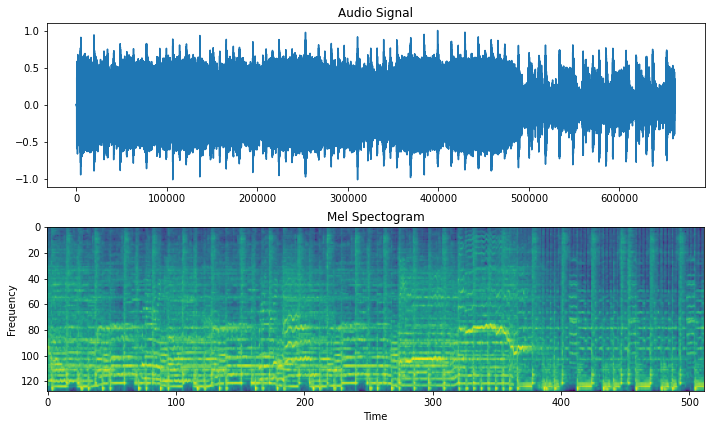

In [3]:
from skimage.transform import resize

signal, sr = librosa.load(sound_sample_file)
    
mels = librosa.power_to_db(librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=128, fmax=8000), ref=np.max)
mel_image = (((80+mels)/80)*255)
mel_image = np.flip(mel_image, axis=0)
mel_image = resize(mel_image, (128,512)).astype(np.uint8)

# mfcc = librosa.power_to_db(librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=128, fmax=8000), ref=np.max)
# mfcc_image = (((80+mfcc)/80)*255)
# mfcc_image = np.flip(mfcc_image, axis=0)
# mfcc_image = resize(mfcc_image, (128,512)).astype(np.uint8)

# chromagram = librosa.feature.chroma_cqt(y=signal, sr=sr)
# chroma_image = resize(chromagram*255, (128,512)).astype(np.uint8)

fig, ax = plt.subplots(nrows=2, figsize=(10,6))
ax[0].set_title('Audio Signal')
ax[0].plot(range(len(signal)), signal)
ax[1].set_title('Mel Spectogram')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Time')
ax[1].imshow(mel_image)
# ax[2].set_title('Mel Frequency Cepstral Coefficient')
# ax[2].imshow(mfcc_image)
# ax[3].set_title('Chromagram')
# ax[3].imshow(chroma_image)
plt.tight_layout()
plt.show()

# Project Pipeline

Steps of the project:

- Scrape song information from Spotify's Public API.
- Convert waveforms from mp3 previews to mel spectograms.
- Train an autoencoder network to extract latent features from the audio information.
- Use UMAP for dimensionality reduction to view the latent space.
- Make recommendations based on cosine similarity in the latent space.
- Results and conclusions

# Initial EDA on Song Information

Using Spotify's Public API, I scraped song information in a previous notebook. From there I can download a 30 second mp3 preview of each song and convert it to a mel spectogram to use in a neural network that trains on images. First, let's take a look a the dataframe, we will be using to collect the mp3 previews.

In [4]:
import numpy as np
import pandas as pd
from pyarrow import feather

tracks_df = feather.read_feather('data/all_tracks.feather')
tracks_df = tracks_df.drop_duplicates(subset=['track_id']).reset_index(drop=True)
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'],  errors='coerce', infer_datetime_format=True)
tracks_df['year'] = tracks_df['release_date'].dt.year
tracks_df.head()

,track_id,track_name,track_preview_link,track_popularity,track_uri,artist_name,artist_id,artist_genres,artist_popularity,release_date,year
0,79620P7nP5cSS7f8ULHfo8,Ha-le-lu-ja,https://p.scdn.co/mp3-preview/54111ab335474758...,18,spotify:track:79620P7nP5cSS7f8ULHfo8,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,2007-11-22,2007.0
1,0uV7yccuJBzpz2A9bYvVKD,Ciao D'Amore,None,35,spotify:track:0uV7yccuJBzpz2A9bYvVKD,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,1998-01-01,1998.0
2,5k8nNRu2aOjssNyCPzmax3,Gott schütze die Frauen - Radio Version,https://p.scdn.co/mp3-preview/e5bdcf4b6163a4b0...,34,spotify:track:5k8nNRu2aOjssNyCPzmax3,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,2004-03-09,2004.0
3,7ATZe396iKRxqYtqXGRlq5,Die längste Nacht der Welt,None,31,spotify:track:7ATZe396iKRxqYtqXGRlq5,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,2000-01-01,2000.0
4,7Jj23tl4vV4SblQgYZgCAL,Her mit meinen Hennen (Der Goggala),https://p.scdn.co/mp3-preview/56e52c31b64dad3d...,31,spotify:track:7Jj23tl4vV4SblQgYZgCAL,Klostertaler,6adGYZ9CU5LPwqLYt6yQc7,"[classic schlager, schlager, volksmusik, zille...",36,2007-11-22,2007.0


In [5]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618133 entries, 0 to 618132
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   track_id            618133 non-null  object        
 1   track_name          618133 non-null  object        
 2   track_preview_link  547011 non-null  object        
 3   track_popularity    618133 non-null  int64         
 4   track_uri           618133 non-null  object        
 5   artist_name         618133 non-null  object        
 6   artist_id           618133 non-null  object        
 7   artist_genres       618133 non-null  object        
 8   artist_popularity   618133 non-null  int64         
 9   release_date        450640 non-null  datetime64[ns]
 10  year                450640 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 51.9+ MB


In [6]:
tracks_df.isna().sum()

track_id                   0
track_name                 0
track_preview_link     71122
track_popularity           0
track_uri                  0
artist_name                0
artist_id                  0
artist_genres              0
artist_popularity          0
release_date          167493
year                  167493
dtype: int64

There are 618133 different tracks in our dataframe, but there are quite a lot of missing preview links for each song. We are also missing quite a bit of row's release date information. Some tracks do not have a preview link for proprietary reasons, or otherwise, but let's take a look to see what we are missing.

In [7]:
missing_links = tracks_df[tracks_df.track_preview_link.isna()]
has_links = tracks_df[~tracks_df.track_preview_link.isna()]

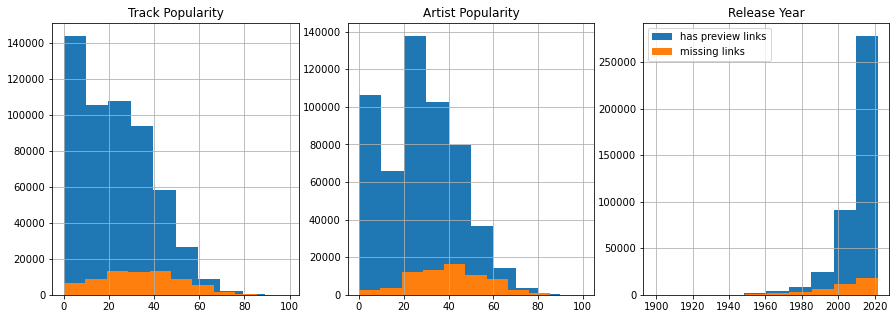

In [8]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].set_title('Track Popularity')
has_links.track_popularity.hist(ax=ax[0], label='has preview links')
missing_links.track_popularity.hist(ax=ax[0], label='missing links')

ax[1].set_title('Artist Popularity')
has_links.artist_popularity.hist(ax=ax[1], label='has preview links')
missing_links.artist_popularity.hist(ax=ax[1], label='missing links')

ax[2].set_title('Release Year')
has_links.year.hist(ax=ax[2], label='has preview links')
missing_links.year.hist(ax=ax[2], label='missing links')

plt.legend()

In [9]:
print('Has Preview Links - Mean Track Popularity:',round(tracks_df.track_popularity.mean(),2))
print('Missing Links - Mean Track Popularity:',round(missing_links.track_popularity.mean(),2))
print('')
print('Has Preview Links - Mean Artist Popularity:',round(tracks_df.artist_popularity.mean(),2))
print('Missing Links - Mean Artist Popularity:',round(missing_links.artist_popularity.mean(),2))

Has Preview Links - Mean Track Popularity: 24.16
Missing Links - Mean Track Popularity: 33.59

Has Preview Links - Mean Artist Popularity: 28.84
Missing Links - Mean Artist Popularity: 39.82


We can easily see that tracks we are missing links for have a higher popularity for each track and each artist associated with that track. That means when we train our neural network on the tracks we will get, there will be a bias towards understanding tracks that are less popular. But there may be other factors we will not be training on as well. For example, what are the distributions of labeled genres for the tracks that don't have preview links?

In [10]:
all_genres = set()
for idx, row in tracks_df.iterrows():
    for genre in row.artist_genres:
        all_genres.add(genre)
        
has_links_genres = dict.fromkeys(all_genres, 0)
for idx, row in has_links.iterrows():
    for genre in row.artist_genres:
        has_links_genres[genre] += 1
        
missing_links_genres = dict.fromkeys(all_genres, 0)
for idx, row in missing_links.iterrows():
    for genre in row.artist_genres:
        missing_links_genres[genre] += 1    

In [11]:
has_links_genres = {k: v for k, v in sorted(has_links_genres.items(), key=lambda item: item[1], reverse=True)}
print('Top 10 genres in tracks that have preview links:')
list(has_links_genres.items())[:10]

Top 10 genres in tracks that have preview links:


[('electro house', 3939),
 ('indie rock', 3536),
 ('rock', 3422),
 ('electronica', 3412),
 ('edm', 3237),
 ('indie folk', 3236),
 ('indie pop', 3198),
 ('dance pop', 3174),
 ('pop', 3118),
 ('modern rock', 3118)]

In [12]:
missing_links_genres = {k: v for k, v in sorted(missing_links_genres.items(), key=lambda item: item[1], reverse=True)}
print('Top 10 genres in tracks that are missing preview links:')
list(missing_links_genres.items())[:10]

Top 10 genres in tracks that are missing preview links:


[('rock', 2108),
 ('dance pop', 1877),
 ('pop', 1750),
 ('hip hop', 1544),
 ('country rock', 1439),
 ('adult standards', 1437),
 ('rap', 1432),
 ('pop rock', 1417),
 ('jazz', 1410),
 ('urban contemporary', 1388)]

Now we can see that the tracks that will not be able to be used also contain a different distribution of genres, in addition to have a different distribution of popularity. This will affect our model's recommendation, as these tracks will not be a part of our recommendation, but most importantly our training. A song's uniqueness will be a part of the latent space that is created by the autoencoder neural network, and missing a unique part of the fabric of the culture of music will be devastating to some recommendations. For others, it will not make much of a difference.

It's good to know how much our model will be biased, because we can better evaluate our results with such analysis, even before training or making recommendations. For now, let's move on to analyzing the images that we will be able to use for training, and how we will transform them before inserting them in the neural network.

# Training and Testing Images

In another notebook, I took preview links from the Spotify API, downloaded the mp3s, and converted the sound files to a composite image that contains the mel spectogram, Mel Frequency Cepstral Coefficient, and Chromagram. I created this composite image with the intent that I might use these other transformations, but for this project I will only be training the neural network on the mel spectograms.

Let's look at an example of the composite images we will find in our data folder, and an example of the mel spectogram that is stored in one channel of the image file, side by side.

In [13]:
import os
from random import sample
from PIL import Image

base_dir = 'data/Spotify/comp_pngs/'
sample_files = sample(os.listdir(base_dir),12)

images = []
for file in sample_files:
    images.append(Image.open(base_dir + file))

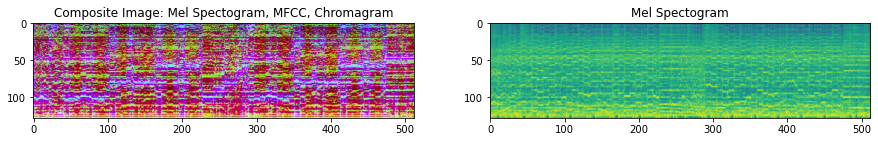

In [14]:
#plot composite image and mel spectorgram, side by side
fig, ax = plt.subplots(ncols=2, figsize=(15,3))
ax[0].set_title('Composite Image: Mel Spectogram, MFCC, Chromagram')
ax[0].imshow(np.array(images[0]))
ax[1].set_title('Mel Spectogram')
ax[1].imshow(np.array(images[0])[:,:,0])

Each mel spectogram contains the frequency and time information for each track and we can see by looking at several examples together that their levels contain a wide range of different images.

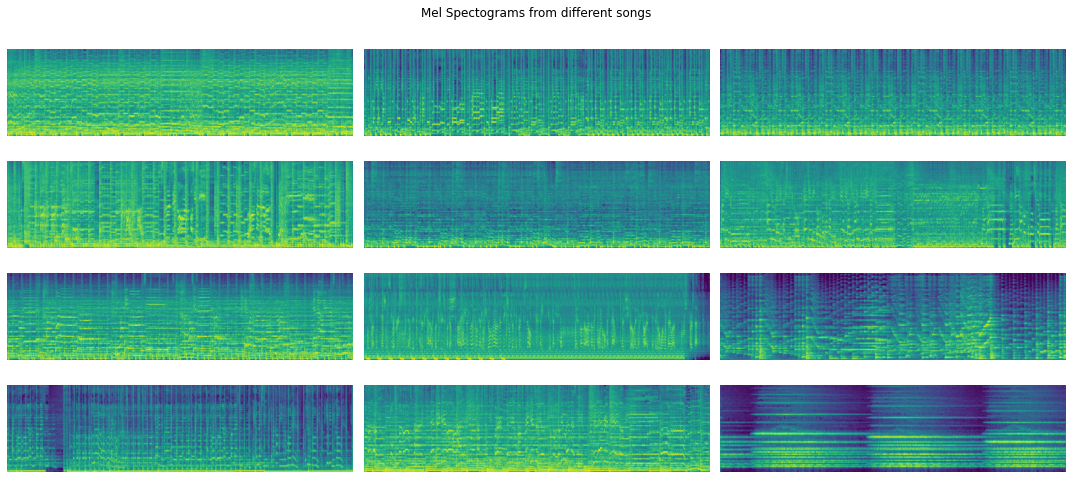

In [15]:
# plot mel spectograms
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(15,7))
plt.suptitle('Mel Spectograms from different songs')
for i, image in enumerate(images):
    ax[i // 3, i % 3].imshow(np.array(image)[:,:,0])
    ax[i // 3, i % 3].axis('off')
plt.tight_layout()
plt.show()

Each image is 512 pixels wide by 128 pixels tall. The neural network will only use images that are 128 by 128 pixels, so here are a few examples of how those slices will appear.

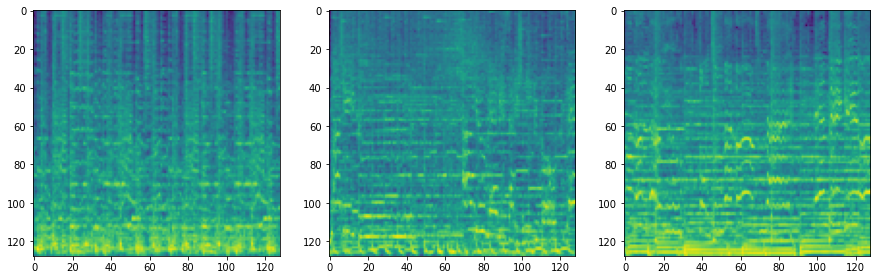

In [16]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[0].imshow(np.array(images[2])[:,:128,0])
ax[1].imshow(np.array(images[5])[:,:128,0])
ax[2].imshow(np.array(images[10])[:,:128,0])

# Autoencoder Model

In order to order to make recommendations for similar songs based off of the sound content alone, I will need to create features that somehow explain the content of the songs. Also, in order to do this quickly, I will need to compress the information of each song into a smaller set of number than the input of mel spectograms.

For each song preview file, there are over 600,000 samples. In each mel spectogram there are 512 x 128 pixels totalling 65,536 pixels. Even a 128x128 image contains 16,384 pixels. This autoencoder model will compress the content of a song into just 256 numbers. Once the autoencoder is trained sufficiently, the network will be able to reconstruct a song from that vector of length 256 with a minimal amount of loss.

An **autoencoder** is a type of neural network that is composed of an **encoder** and a **decoder**. First, the encoder will compress the information of the input into a much smaller amount of data, and the decoder will reconstruct the data to be as close to the original output as possible.

An autoencoder is also a special type of neural network in that it is not supervised, although it is not quite unsupervised. It is self-supervised, because it uses its own input to train the outputs of the model.


![](img/Basic_Autoencoder.png)

When working with images, the encoder is a sequence of two-dimensional convolutional layers, that create weighted filters to extract patterns in the image, while also each compressing the image into a smaller and smaller shape. The decoder is a mirror reflection of the process in the encoder, reshaping and expanding a small amount of data into a larger one. The model minimizes the mean squared error between the original and the reconstruction. Once trained sufficiently, the mean squared error between the original and the output of the model will be very small. Although the mean squared error will be minimal, there is still a visual difference between the reconstruction and the original image, especially in the smallest details. The autoencoder is a noise reducer. We want to extract as many details as possible, but ultimately, the autoencoder will also blend some details together.

I initially trained the network using the structure illustrated above, but found that many details were missing in the reconstructions. The convolutional layers are search for patterns that are just a small slice of the entire image. But after training and observing the filters, it is difficult to intuit the patterns that are extracted.

Autoencoders like these can be used on a number of different problems, and with convolutional layers, there are many applications for image recognition and generation. But since the mel spectogram is not only an image, but a graph of frequencies in the sound content over time, I believe a slightly different structure can be implemented to minimize the loss in reconstruction, while also minimizing the uncertainity created by the 2-dimensional convolutional layers.

In the model used for the final results of the model, I split the encoder into two separate encoders. Each encoder uses **one-dimensional convolutional layers** to compress the space of the image. One encoder is training on X, while the other is training on X transpose, or a 90 degree rotated version of the input. This way one encoder is learning information from the time axis of the image, and the other is learning from the frequency axis.

![](img/Time_Freq_Autoencoder.png)

After the input runs through each encoder, the resulting encoded vectors are concatenated into one vector and input into the **two-dimensional** convolutional decoder as illustrated before. The outputs are trained to minimize the loss between the inputs as before.

In the end, the loss in the final model was much lower than in the basic structure, reaching a mean squared error of 0.0037 (training) and 0.0037 (validation) after 20 epochs, with 125,440 images in the training set, and 2560 in the validation set.

We will be building the model for demonstrative purposes only, as I trained the model in another notebook, and will load the weights from the trained model once it is built.

In [17]:
# import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , Flatten, Reshape, Conv2DTranspose, BatchNormalization, Conv1D, Input
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

# import custom classes for data generators and saving the latent space after running inference on the entire set.
from src.DataGenerator import AudioDataGenerator
from src.LatentSpace import LatentSpace
from src.helper_functions import plot_reconstruction

In [18]:
# custom data generator initialization

data_gen = AudioDataGenerator(
    directory='data/Spotify/comp_pngs/', 
    image_size=(128,512), 
    color_mode='rgb',
    batch_size=32,
    sample_size=128000,
    shuffle=True,
    train_test_split=True, 
    test_size=0.02,
    output_channel_index=0,
    output_size=(128,128))


Found 125440 files for Training set
Found 2560 files for Test set


In [19]:
img_width = 128
img_height = 128
num_channels=1
kernel_size = 5
strides = 2

In [20]:
# build the auto encoder

class Time_Freq_Autoencoder_Builder:
    
    def build(width, height, depth, filters=(32,64,128,256), latent_dim=256, kernel_size=5):
        
        strides = 2
        
        input_shape = (height, width, depth)
        inputs = Input(shape = input_shape)
        
        chan_dim = -1
        
        # input for x_time will be the original image, and x_freq will be the transpose of the image
        
        x_time = Reshape(target_shape=(height,width))(inputs)
        x_freq = Reshape(target_shape=(height,width))(tf.transpose(inputs, perm=[0,2,1,3]))
        
        # add Conv1d layers for time encoder
        
        for f in filters:
            
            x_time = Conv1D(f, kernel_size=kernel_size, strides=strides, padding='same', activation='relu')(x_time)
            x_time = BatchNormalization(axis=chan_dim)(x_time)
            
        # flatten and create a dense layers for half of the latent space dimensions, that will be concatenated with the freq encoder
            
        x_time = Flatten()(x_time)
        latent_time = Dense(latent_dim//2)(x_time)
        
        # add Conv1d layers for freq encoder
        
        for f in filters:
            
            x_freq = Conv1D(f, kernel_size=kernel_size, strides=strides, padding='same', activation='relu')(x_freq)
            x_freq = BatchNormalization(axis=chan_dim)(x_freq)
            
        # flatten and dense layer for frequency latent space
        
        x_freq = Flatten()(x_freq)
        latent_freq = Dense(latent_dim//2)(x_freq)
        
        # concatenate the two latent spaces from the two encoders
        
        latent_concat = tf.keras.layers.Concatenate(axis=1)([latent_time, latent_freq])
        
        # build encoder from layers
        
        encoder = Model(inputs, latent_concat, name='encoder')
        
        # build decoder
        
        latent_inputs = Input(shape=((latent_dim//2)*2))
        
        # reshape for expansion with Conv2dTranspose layers
        
        x = Dense(16384, activation='relu')(latent_inputs)
        x = Reshape(target_shape=(8,8,256))(x)
        
        # Conv2dTranspose layers
        
        for f in filters[::-1]:
            
            x = Conv2DTranspose(f, kernel_size=kernel_size, strides=strides, padding='same', activation='relu')(x)
            x = BatchNormalization(axis=chan_dim)(x)
            
        x = Conv2DTranspose(depth, kernel_size=kernel_size, padding='same', activation='sigmoid')(x)
        
        outputs = x
        
        # build decoder from layers
        
        decoder = Model(latent_inputs, outputs, name='decoder')
        
        # build autoencoder from encoder and decoder outputs
        
        autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
        
        return (encoder, decoder, autoencoder)
    

# custom Model class to build autoencoder    

class Time_Freq_Autoencoder(tf.keras.Model):
    
    def __init__(self, image_width, image_height, image_depth=1, latent_dim=256, kernel_size=5):
        super().__init__()
        
        self.encoder, self.decoder, self.autoencoder = Time_Freq_Autoencoder_Builder.build(width=image_width, height=image_height, depth=image_depth, latent_dim=256, kernel_size=kernel_size)
        
    def call(self, x):
        autoencoded = self.autoencoder(x)
        return autoencoded
    
autoencoder = Time_Freq_Autoencoder(image_width=img_width, image_height=img_height, latent_dim=256, kernel_size=5)

The model is trained with an Adam optimizer with a learning rate of .001, and a loss function of mean squared error.

In [21]:
opt = Adam(learning_rate=1e-3)

autoencoder.compile(optimizer=opt, loss=tf.keras.losses.mse)

In [22]:
autoencoder.build(input_shape=(None,img_height,img_width,num_channels))

In [23]:
autoencoder.summary()

Model: "time__freq__autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Functional)        (None, 256)               1000384   
                                                                 
 decoder (Functional)        (None, 128, 128, 1)       6927489   
                                                                 
 autoencoder (Functional)    (None, 128, 128, 1)       7927873   
                                                                 
Total params: 7,927,873
Trainable params: 7,924,993
Non-trainable params: 2,880
_________________________________________________________________


The model summary shows that the autoencoder is composed of the encoder and decoder. 

If we look at the summary of the encoder, it might look a little confusing. The convolutional layers for each encoder are displayed next two each other, even though they are receiving and passing on totally different data.

In [24]:
autoencoder.encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 tf.compat.v1.transpose (TFOpLa  (None, 128, 128, 1)  0          ['input_1[0][0]']                
 mbda)                                                                                            
                                                                                                  
 reshape (Reshape)              (None, 128, 128)     0           ['input_1[0][0]']                
                                                                                            

In [25]:
autoencoder.decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 dense_2 (Dense)             (None, 16384)             4210688   
                                                                 
 reshape_2 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 256)      1638656   
 nspose)                                                         
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 256)      1024      
 hNormalization)                                                 
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      8193

We have already trained the model previously for 20 epochs and reached a mean squared error of 0.0037. Since we have already trained the model, we will load the weights in.

In [26]:
# hist = autoencoder.fit(data_gen.train,
#                        batch_size=data_gen.batch_size,
#                        epochs=20,
#                        validation_data=data_gen.test)

In [27]:
# load model

autoencoder_path = 'data/autoencoder_256dim_time_freq_128k_20epochs'
#autoencoder.save(autoencoder_path)
autoencoder = tf.keras.models.load_model(autoencoder_path)

We can test the model's ability to reconstruct an image. The left image is the original input and the middle image is the output. The image on the right is an illustration of the loss between the input and the output. The red and blue sections are parts of the image that the model is not reconstructing.

2022-08-24 15:54:19.186483: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


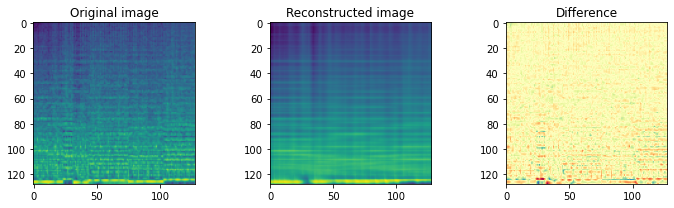

In [28]:
test_img = data_gen.take(1)[0]
prediction = autoencoder(test_img)

plot_reconstruction(test_img, prediction, 1)

# Build Latent Space from Encoder

Using a custom class for running inference through the network and saving results, we can construct the latent space for every mel spectogram we have. We can do this by running the data only through the encoder and receiving a vector the size that we initialized the model with, in this case, 256 dimensions.

In [29]:
from src.LatentSpace import LatentSpace

latent_space = LatentSpace(autoencoder_path=autoencoder_path,
                        image_dir='data/Spotify/comp_pngs/',
                        tracks_feather_path='data/all_tracks.feather',
                        latent_dims=256,
                        output_size=(128, 128),
                        num_tiles=64)

Found 278581 files for Generator set


In [30]:
# latent_space.build()
# latent_space.save(autoencoder_path)

In [31]:
latent_space.load(autoencoder_path)

Loaded tracks.
Loaded artists.
Loaded genres.
loaded scaler


After saving results from a previous build, we can load the results and preview each dataframe. The class object builds dataframe for tracks, tracks averaged by artist, and tracks averaged by genre.

In [32]:
latent_space.tracks.head()

,id,filename,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,track_id,track_name,track_preview_link,track_popularity,track_uri,artist_name,artist_id,artist_genres,artist_popularity,release_date
0,2714ySK1pbOIGZwABmRyAz,2714ySK1pbOIGZwABmRyAz.png,-0.931030,-0.627242,0.101877,-0.478947,-0.251039,0.625820,0.492011,0.245462,...,2714ySK1pbOIGZwABmRyAz,"New Phone, Who Dis?",https://p.scdn.co/mp3-preview/8e69de2b8de12b3a...,51,spotify:track:2714ySK1pbOIGZwABmRyAz,Flatbush Zombies,1dqGS5sT6PE2wEvP1gROZC,"[escape room, hip hop, psychedelic hip hop, ra...",57,None
1,2e2aOrLcQTUEXR4hqRmZu5,2e2aOrLcQTUEXR4hqRmZu5.png,1.206389,1.273550,0.557408,0.325929,-0.081681,0.516642,0.388528,-0.636514,...,2e2aOrLcQTUEXR4hqRmZu5,Head up High,https://p.scdn.co/mp3-preview/d7c1a143ef89ce62...,21,spotify:track:2e2aOrLcQTUEXR4hqRmZu5,ReVamp,4LPznDHsWRPbEivBW6aYqv,"[dutch metal, gothic metal, gothic symphonic m...",31,2010-05-28
2,5yoso32yG1Hr7N7bHyqxgP,5yoso32yG1Hr7N7bHyqxgP.png,0.453407,0.416593,1.587540,2.043391,0.452955,-0.940199,1.172614,1.251194,...,5yoso32yG1Hr7N7bHyqxgP,Pippo non lo sa,https://p.scdn.co/mp3-preview/8fc3718642f2d9e8...,12,spotify:track:5yoso32yG1Hr7N7bHyqxgP,Elisa Mutto,2cDzLYTvX8elVX6ET3HkX6,[musica per bambini],27,2006-07-12
3,2ML39pfZ4Put7sFdVC7xS7,2ML39pfZ4Put7sFdVC7xS7.png,1.088135,1.588436,0.318530,-0.424181,-0.586271,-0.366699,0.590407,-1.637880,...,2ML39pfZ4Put7sFdVC7xS7,Ho! Riddim - Funtcase Remix,https://p.scdn.co/mp3-preview/509816634d21e860...,16,spotify:track:2ML39pfZ4Put7sFdVC7xS7,Marco Del Horno,1G0ey7gIOTwRwPF0MwQLzm,[],5,2010-09-24
4,7noCCIGE5wGM6JsU51B3eR,7noCCIGE5wGM6JsU51B3eR.png,0.599516,0.680319,0.226810,-0.012162,-1.036578,-0.090334,-0.514148,-0.163585,...,7noCCIGE5wGM6JsU51B3eR,Critical,https://p.scdn.co/mp3-preview/76139748a05eb4b7...,23,spotify:track:7noCCIGE5wGM6JsU51B3eR,Ikechukwu,7xhdfJjebilccfAhprilhE,"[afro dancehall, igbo pop, naija old school]",21,None


In [33]:
latent_space.artists.head()

,artist_id,artist_name,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,0001wHqxbF2YYRQxGdbyER,Motion Drive,0.094055,0.299594,-0.904645,0.391868,-0.335987,-0.212414,0.538867,-1.088651,...,-0.019800,0.052035,-0.305666,-0.180554,-0.318697,-0.039826,0.189814,-0.339433,-0.945844,-0.053682
1,001TRduQniM6dsJbQpMsbJ,Javier Limón,-0.404210,-0.339065,-1.185924,1.120668,1.690604,1.573542,1.995936,0.940393,...,0.095754,0.215122,0.098326,-1.348061,0.271115,0.962337,-0.121738,0.590502,-0.159690,0.071700
2,0027wHZDQXpRll4ckwDGad,Disco Ensemble,1.274126,1.078891,0.141120,0.954025,0.347462,0.623607,-0.192557,-0.013453,...,0.936691,-1.066810,-1.037837,0.843632,0.618817,-1.022848,-0.636312,-0.086308,0.067852,-0.877281
3,003PCFEqETGNDYCMy8JIvu,B.O.U.,-0.029958,-0.125550,-0.518238,-0.700960,-0.384348,-0.094934,1.636725,0.856333,...,0.148727,-0.188017,0.111225,-0.503841,0.474732,0.299487,0.457337,-0.077087,-0.609082,-0.216668
4,003ScA1EGXbCLpKFucHXb3,Eli Kazah,-1.427602,-1.390689,1.532729,0.615871,0.128672,-1.409343,-0.327237,0.070581,...,-0.852220,1.179203,1.250568,-0.714381,-1.113865,1.628543,0.496771,-0.474281,-0.714886,1.530660


In [34]:
latent_space.genres.head()

,genre,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,21st century classical,-1.535658,-1.571538,0.409733,0.038942,0.015911,-0.829710,-0.933645,0.370987,1.132849,...,-1.608474,1.609478,1.436630,-1.325344,-1.470463,1.417724,1.412986,-0.152762,0.095395,1.481934
1,48g,0.465401,0.407054,-0.122822,0.387143,0.104606,0.647331,0.484216,-0.152049,-0.412596,...,0.357746,-0.288952,-0.407772,0.524386,0.546015,-0.735542,-0.162032,0.142837,0.110229,-0.384681
2,5th wave emo,0.673073,0.628712,-0.456297,-0.462625,-0.576368,-0.018862,0.427897,0.515733,-0.752064,...,0.376483,-0.460527,-0.453029,0.291607,0.291650,-0.187623,-0.072429,-0.092280,-0.369446,-0.339280
3,a cappella,-0.006347,0.028924,-0.412234,-0.274758,0.244279,0.802098,0.153304,0.468680,0.023359,...,0.277468,-0.198887,-0.076922,-0.165611,0.337405,0.379719,0.108489,0.082855,-0.290571,-0.324002
4,a3,0.956163,0.931503,-0.268222,0.110756,1.078255,-0.477445,0.515274,-0.165191,-0.950026,...,0.185885,-0.388863,-1.459097,-0.394102,-0.798759,-0.125821,1.093772,-1.294089,-2.228819,-0.579698


# Latent Space EDA - The Sonic Landscape

To explore the 'landscape' created by the latent space of the data through the model, we can use dimensionality reduction. UMAP, like T-SNE, can somewhat quickly reduce the a multidimensional space into 2 dimensions for visualing in a plot.

In [35]:
import umap
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.cluster import KMeans
import umap.plot
from sklearn.cluster import MiniBatchKMeans
from pyarrow import feather
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# isolate the data from only the latent columns for use in the UMAP transformer
data = latent_space.tracks[latent_space.latent_cols]

In [37]:
data

,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,-0.931030,-0.627242,0.101877,-0.478947,-0.251039,0.625820,0.492011,0.245462,1.223624,1.266876,...,0.485883,-0.092142,0.650495,-0.227040,0.535643,1.033859,-1.614182,1.753295,0.605785,-0.187070
1,1.206389,1.273550,0.557408,0.325929,-0.081681,0.516642,0.388528,-0.636514,-1.006628,0.178256,...,0.914649,-1.042892,-1.139270,1.009379,1.087832,-0.930393,-0.923536,0.469667,0.460890,-0.881931
2,0.453407,0.416593,1.587540,2.043391,0.452955,-0.940199,1.172614,1.251194,-0.405293,-0.797569,...,0.239428,-0.673582,-0.153477,0.071661,1.029765,-0.788574,0.129701,0.479035,1.027465,-0.545689
3,1.088135,1.588436,0.318530,-0.424181,-0.586271,-0.366699,0.590407,-1.637880,-1.415497,0.426565,...,0.545312,-0.824384,-1.029909,-0.059706,0.542504,-0.812980,0.716340,-0.678522,-0.678320,-1.346973
4,0.599516,0.680319,0.226810,-0.012162,-1.036578,-0.090334,-0.514148,-0.163585,-0.444001,0.675905,...,0.983848,-0.790166,-0.988888,0.062000,0.607584,-0.214391,-0.704413,0.701064,0.099844,-0.888792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278576,-0.141969,-0.228623,-0.765526,0.119331,-0.532499,0.538567,-0.038078,-0.131387,0.338143,0.779431,...,0.164500,-0.306768,0.007112,-0.020533,0.786471,-0.473560,-1.083223,0.942838,1.161088,-0.133268
278577,1.333951,0.999337,1.281820,0.438317,1.391258,-0.022001,0.716352,1.791649,-1.956721,-1.713659,...,0.664482,-0.844193,-0.803701,0.959144,0.627290,-1.160024,-0.076161,-0.148335,0.377666,-1.020388
278578,-0.593010,-0.709486,0.669053,-1.109215,0.065182,1.865841,-0.141215,0.290322,1.511206,0.327515,...,-0.150501,0.634205,-0.319659,-1.520174,-1.262274,1.590920,-0.515604,-0.776541,-1.779178,0.597594
278579,0.191761,-0.075300,0.949650,0.327106,0.304808,-0.639967,-0.004349,0.091453,-0.074483,0.988164,...,-0.254475,-0.003452,0.249319,-0.503139,-0.402495,-0.834654,-0.083222,-0.214365,0.070678,0.366572


In [38]:
# use UMAP to reduce the 256 dimension space into just 2 dimensions for all tracks
embedding = umap.UMAP(n_neighbors=500, min_dist=.5).fit_transform(data)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


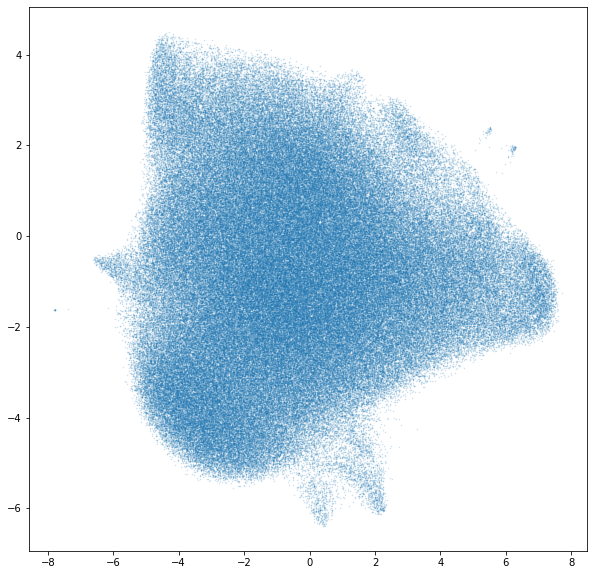

In [39]:
fig, ax = plt.subplots(1, figsize=(10, 10))
plt.scatter(*embedding.T, s=0.3, alpha=.2)

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


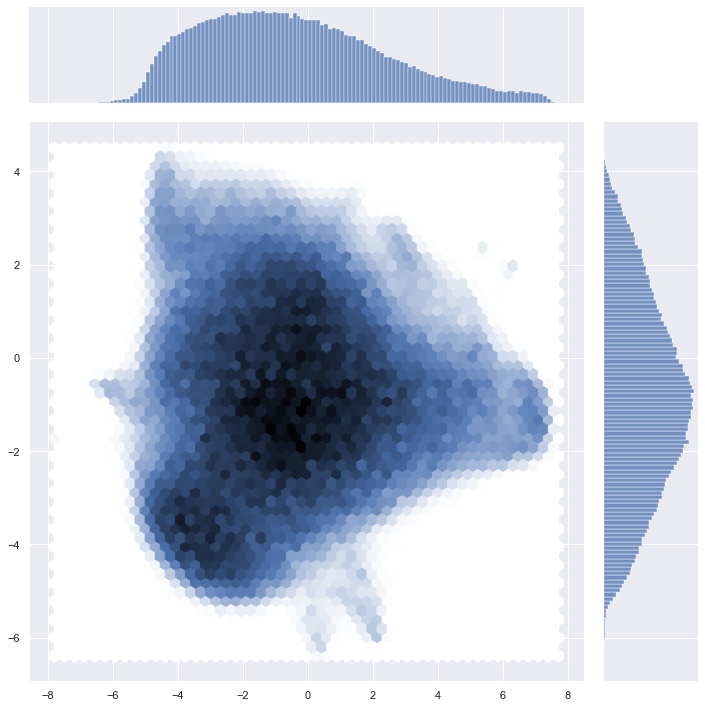

In [69]:
sns.jointplot(*embedding.T, kind='hex', height=10)


Using a low alpha, or the hex plot, we can already notice there are some clusters. Also the UMAP projection creates a well defined shape of all the tracks.

Now, we can use the same method to plot the genres' latent space.

In [41]:
genre_map = umap.UMAP(n_neighbors=100, min_dist=.1).fit(latent_space.genres[latent_space.latent_cols])
genre_hover_data = pd.DataFrame(latent_space.genres.genre)
umap.plot.output_notebook()
p = umap.plot.interactive(genre_map, point_size=10, hover_data=genre_hover_data)
umap.plot.show(p)

Loading BokehJS ...

I will try to find a approximate number of clusters with in the genres latent space using K-means clustering.

In [42]:

data_sample = latent_space.genres[latent_space.latent_cols]
results=[]
kmeans_predictions = []
gmm_predictions = []
for k in range(2,60):
    kmeans = MiniBatchKMeans(n_clusters=k).fit(data_sample)
    predict = kmeans.predict(data_sample)
    result = {
        'k':k,
        'inertia': kmeans.inertia_,
        'silhouette': silhouette_score(data_sample, predict),
    }
    results.append(result)
    kmeans_predictions.append(predict)
    print(result, end='\r')
cluster_results = pd.DataFrame(results)

In [43]:
clusters = 10

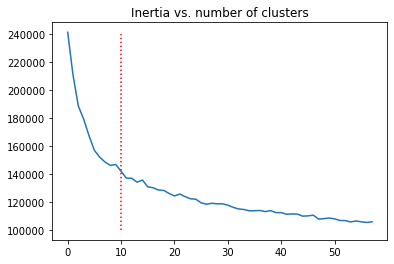

In [44]:
fig, ax = plt.subplots()
ax.set_title('Inertia vs. number of clusters')
cluster_results.inertia.plot(ax=ax)
ax.vlines(x=clusters, ymin=100000, ymax=240000, colors='red', linestyles='dotted')

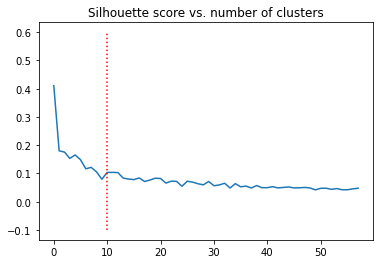

In [45]:
fig, ax = plt.subplots()
ax.set_title('Silhouette score vs. number of clusters')
cluster_results.silhouette.plot()
ax.vlines(x=clusters, ymin=-.1, ymax=.6, colors='red', linestyles='dotted')

Based on the inertia plot, we can try to determine the number of clusters by finding the elbow in the plot. In this plot the elbow is hard to see, so we will pick 10 clusters as an approximate number in the space. 

Now, I can replot the genres' latent space with the clusters labeled by color.

In [46]:
genre_projected = latent_space.genres[latent_space.latent_cols].astype('float32')
kmeans_genre = MiniBatchKMeans(n_clusters=clusters).fit(genre_projected)
p = umap.plot.interactive(genre_map, labels = kmeans_genre.predict(genre_projected), point_size=10, hover_data=genre_hover_data)
umap.plot.show(p)

The K-Means clustering labels seems to make interesting clusters from the data.

My intuitions after analyzing the clusters:

 - blue: Death Metal
 - peach: Hard Rock, Punk
 - crimson red: electronic, electronic pop, hip hop
 - yellow: dance, house, disco
 - purple: edm, dance, pop
 - lemon yellow: jazz, indie rock, traditional
 - red: jazz, salsa
 - orange: classical, choir, voice
 - turquoise: classical performance, symphonic
 - light green: piano, individual instruments, ambient

We will predict the same clusters on all tracks and replot the projection with the same labeled clusters.

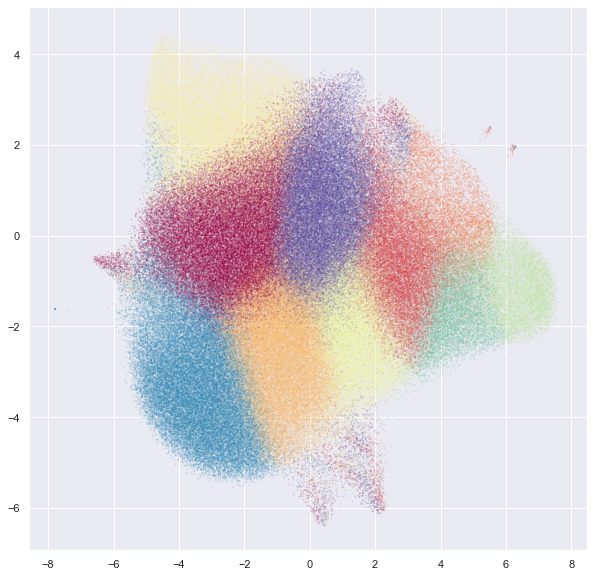

In [71]:
fig, ax = plt.subplots(1, figsize=(10, 10))
plt.scatter(*embedding.T, s=0.3, alpha=.2, c=kmeans_genre.predict(data), cmap='Spectral')
plt.savefig('img/tracks_clusters_umap.png')
plt.show()

# Get Recommendations

The custom LatentSpace class will search for recommendations using cosine similarity for each vector.

1. First, we will use the Spotify API to make a search on a query. 
2. The API will return the mp3 preview for the first result and run the mel spectogram through the encoder. 
3. Then we compare cosine similarity on the latent space columns of the entire track database.
4. Sort the result, and return the top ten highest scores.

![](img/Cosine_similarity.png)

In [75]:
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# using secret client_id and client_secret stored in json file
f = open('data/apikeys/.apikeys.json')
apikeys = json.load(f)
client_id = apikeys['clientId']
client_secret = apikeys['clientSecret']

credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# use spotipy to make a Spotify client
spotify = spotipy.Spotify(client_credentials_manager=credentials_manager)

In [76]:
query = 'venus television'

In [84]:
# search Spotify
track = spotify.search(query)['tracks']['items'][0]

In [87]:
print(track['name'])
print(track['artists'][0]['name'])

Venus
Television


In [90]:
# save track_id and preview link
track_id = track['id']
link = track['preview_url']

In [93]:
# create mel spectogram and run through the encoder
vector = latent_space.get_vector_from_preview_link(link, track_id)
vector

/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,latent_8,latent_9,...,latent_246,latent_247,latent_248,latent_249,latent_250,latent_251,latent_252,latent_253,latent_254,latent_255
0,0.309915,0.183733,-0.372236,2.319754,1.347322,-1.427525,0.040397,-0.746315,-0.503525,-1.547119,...,-0.261792,-0.348447,0.177351,-0.251159,-0.000112,-0.518966,0.425207,-0.018187,0.17161,-0.24129


In [ ]:
# get recommendations from LatentSpace cosine similarity search
latents = latent_space.get_similarity(vector, latent_space.tracks, subset=latent_space.latent_cols, num=11)
latents = latents[~latents.track_name.apply(lambda x: x.lower()).isin([track['name'].lower()])][:10].reset_index()

In [106]:
# or, we can just use the LatentSpace class to create a dataframe of results
latent_space.search_for_recommendations('Venus Television', num=10, get_time_and_freq=True)

Venus
Television
https://p.scdn.co/mp3-preview/6201cc5dd8e7fefbbe9604571a5f1732291d48a7?cid=5f818fbc1c374e239ee0139163734165


/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


,track_name,track_uri,artist_name,similarity,track_popularity,time_similarity,frequency_similarity
0,Venus,spotify:track:3x0iCzjgf0v9lnwvAhU9P2,Television,1.000000,45,1.000000,1.000000
1,You're Sleeping,spotify:track:2Qx06bf3RfUfpRF60aOQsI,Tiger Trap,0.651489,27,0.656185,0.634169
2,What Happens When You Turn the Devil Down,spotify:track:1H1KT4VlIrsLh5h2rRHvD7,The Mystery Lights,0.645824,49,0.650050,0.639647
3,Tonight,spotify:track:7ltz45bI4KMOrqXzJsOL1u,The Soft Boys,0.636164,23,0.607050,0.738699
4,You & Me,spotify:track:442N7jd0ofboiRshlhysTB,Tiger Trap,0.626727,26,0.674555,0.537931
5,Long Way Down,spotify:track:0x6bOGiteaphRfSRbMJo5f,Highway 101,0.621708,29,0.569291,0.797468
6,If I Had A Rocket Launcher,spotify:track:01Q1QVzXToNlHRrytdtpR3,Bruce Cockburn,0.614655,32,0.687866,0.288704
7,Always,spotify:track:3wsd40wHyOpdOv3nZnWCqc,Tom Verlaine,0.608557,12,0.635302,0.556161
8,Black Moment,spotify:track:5at4btSrULt4yP5zxsDwP3,The Black Noodle Project,0.604728,29,0.664925,0.425893
9,Hollow Moon,spotify:track:59kVUeBKnnDDq3ILDqcG18,Magic Castles,0.601045,16,0.591762,0.641386


Here are the recommendations based on our query 'Venus' by the band 'Television'.

We can see the cosine similarities for each track under the `similarity` column. Also, we can just get the similarities from the time encoder columns in `time_similarity` or the frequency encoder columns, `frequency_similarity`.

Finally, we can transform the current track and its recommendations using a previously fit UMAP object, that was fit on the genre seeds from Spotify's API. These genres are the means of all the tracks that are tagged with each of these genres.

In [122]:
import plotly_express as px
from joblib import load

this_track_df = pd.DataFrame(vector, columns=latent_space.latent_cols)
this_track_df['name'] = track['name'] + ' - ' + track['artists'][0]['name']
this_track_df['label'] = 2

latents['name'] = latents['track_name'] + ' - ' + latents['artist_name']
latents['label'] = 1
latents = latents[['name'] + latent_space.latent_cols + ['label']]

base_genres = feather.read_feather('data/base_genres.feather')

genres_and_tracks = pd.concat([base_genres, latents, this_track_df]).reset_index(drop=True)
genre_map = load('data/genre_map.bin')
genre_map_trans = genre_map.transform(genres_and_tracks[latent_space.latent_cols])

genre_map_df = pd.DataFrame(genre_map_trans, columns=['x','y'])
genre_map_df = pd.concat([genres_and_tracks[['name','label']], genre_map_df], axis=1)
genre_map_df.label = genre_map_df.label.map({0:'genre', 1:'similar song', 2:'this song'})
genre_map_df['annotation'] = genre_map_df.apply(lambda x: x['name'] if x['label'] == 'genre' else '', axis=1)

fig = px.scatter(genre_map_df, x='x', y='y', color='label', hover_name='name', size=[.5]*len(genre_map_df), width=800, height=600, text='annotation')
fig.show()

Finally, we can see that the current track, as well as its recommendations exist in a similar space in the projected UMAP plot. In this example, most of the recommendations are close to the rock genre. But like most recommendations, their cosine similarity in the full dimensions of the latent space, may look different in the UMAP projection.

# Results and Conclusions

I've been endlessly searching through this recommendation system, and I am satisfied that the model is able to pick out very interesting connections between different but also similar musical sounds. Here are some of my conclusions:

### 1. The recommendations are more connected than can be heard.

What I mean by this is that the model is making recommendations based on the sound content in each song, but it is not actually listening to the song. It creates a mel spectogram and makes a mathematical comparison.

Sometimes the system will make a recommendation for a song based on its age. If a song was recorded a long time ago, those particular frequencies of the recording material or equipment will be picked up by the model, and display the results.

Also, the model is very good at picking up voice or particular instruments. Because of this, if a song has a lot of talking or talking-singing, it might only recommend spoken word tracks. Also, if there is a lot of distortion in a song, it might recommend rain sounds or bird songs.



### 2. Some genres or artists are underrepresented in the data.

Some track previews are unavailable in the Spotify API, as pointed out in my initial EDA. Therefore, there contribution to the model is also missing and won't be a recommendation when they might be a perfect fit for one. Example: there are no songs by James Brown, or the Beatles, or Prince.



### 3. Needs more data.

The system is using over 278,000 previews to make recommendations, and that's still not enough. Looking at the UMAP projection for all tracks, there is a lot of continuity in the data, but there are some holes. Ideally, the system could use a lot more data to draw on.

### 4. It is a feature of a recommendation system and not an ensemble model.

What makes a recommendation system/service like Spotify so good at making recommendations is that it combines many different types of recommendation systems and features like this one to provide recommendations. From tracking what you regularily listen to, to using collaborative filtering to find recommendations based on similar user usage, Spotify can make much more balanced predictions for what someone will like and listen to. I do find this model interesting at making predictions, but it can definitely be enchanced by add more features like similar genres, release years, and similar user data to make better predictions.

### 5. The sonic landscape is a continuous space.

All in all, apart from making predictions and recommendations, I feel this model's true importance exists in explaining the continuity and spectrum of musical language and sound. Genres are labels that people place on an artist or sound, but genres blend together and every sounds exists in this continous space, at least mathematically.